In [83]:
from sklearn import preprocessing

from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from IPython.display import Image  

import pydotplus
import io

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz

from imblearn.over_sampling import SMOTE 


import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

%config InlineBackend.figure_format = 'svg'


from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


In [2]:
df = pd.read_csv('WFH_WFO_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           207 non-null    int64 
 1   Name                         207 non-null    object
 2   Age                          207 non-null    int64 
 3   Occupation                   207 non-null    object
 4   Gender                       207 non-null    object
 5   Same_ofiice_home_location    207 non-null    object
 6   kids                         207 non-null    object
 7   RM_save_money                207 non-null    object
 8   RM_quality_time              207 non-null    object
 9   RM_better_sleep              207 non-null    object
 10  calmer_stressed              207 non-null    object
 11  RM_professional_growth       207 non-null    int64 
 12  RM_lazy                      207 non-null    int64 
 13  RM_productive                207 no

In [3]:
categorical = []
numerical = []
for col in df.columns:
    if df[col].dtype != 'int64':
        categorical.append(col)
    else:
        numerical.append(col)
print('\n categorical {}'.format(categorical))
print('\n numerical {}'.format(numerical))


 categorical ['Name', 'Occupation', 'Gender', 'Same_ofiice_home_location', 'kids', 'RM_save_money', 'RM_quality_time', 'RM_better_sleep', 'calmer_stressed', 'digital_connect_sufficient', 'RM_job_opportunities']

 numerical ['ID', 'Age', 'RM_professional_growth', 'RM_lazy', 'RM_productive', 'RM_better_work_life_balance', 'RM_improved_skillset', 'Target']


In [4]:
df[categorical].nunique()
binary_cols = []
for col in df[categorical].nunique().index:
    if(df[categorical].nunique()[col] == 2 and col != 'Gender'):
        binary_cols.append(col)
binary_cols.append('Same_ofiice_home_location')


In [5]:
df['is_stressed'] = df['calmer_stressed'].replace({
    'CALMER': 0,
    'STRESSED': 1
})

df['is_better_sleep'] = df['RM_better_sleep'].replace({
    'Yes': 1,
    'No': 0
})

df['is_quality_time'] = df['RM_quality_time'].replace({
    'Yes': 1,
    'No': 0
})
df['is_digital_connect_sufficient'] = df['digital_connect_sufficient'].replace({
    'Yes': 1,
    'No': 0
})

df['have_kids'] = df['kids'].replace({
    'Yes': 1,
    'No': 0
})

df['does_save_money'] = df['RM_save_money'].replace({
    'Yes': 1,
    'No': 0
})

df['is_office_near_home'] = df['Same_ofiice_home_location'].replace({
    'Yes': 1,
    'No': 0,
    'yes': 1
})

df['Gender'] = df['Gender'].replace({
    'Male': 1,
    'Female': 0
})

In [6]:
df.drop(binary_cols, inplace=True, axis=1)
df.head()

,ID,Name,Age,Occupation,Gender,RM_professional_growth,RM_lazy,RM_productive,RM_better_work_life_balance,RM_improved_skillset,RM_job_opportunities,Target,is_stressed,is_better_sleep,is_quality_time,is_digital_connect_sufficient,have_kids,does_save_money,is_office_near_home
0,1,Bhavana,45,Tutor,0,5,1,5,5,5,Yes,1,0,1,1,1,1,1,1
1,2,Harry,24,Tutor,1,2,2,2,3,3,No,1,0,0,0,0,0,0,0
2,3,Banditaa,53,HR,0,3,3,4,5,3,No,1,0,1,1,0,1,1,1
3,4,Neetha,26,Engineer,0,3,4,4,4,5,Yes,0,1,0,1,0,0,1,1
4,5,Ram,26,Recruiter,1,3,3,5,4,2,Yes,1,1,0,1,1,0,0,1


In [7]:
df['RM_job_opportunities'].value_counts()

Not sure    87
Yes         75
No          45
Name: RM_job_opportunities, dtype: int64

<AxesSubplot:xlabel='Target', ylabel='count'>

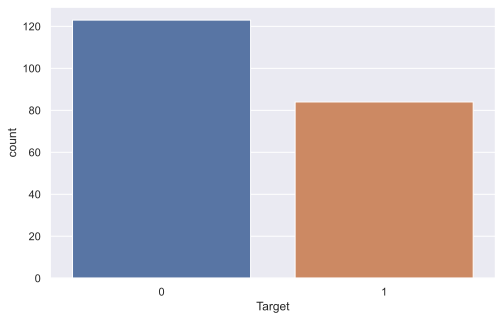

In [8]:
fig, ax = plt.subplots(figsize=(8, 5))

sns.countplot(x='Target', data=df)

<AxesSubplot:>

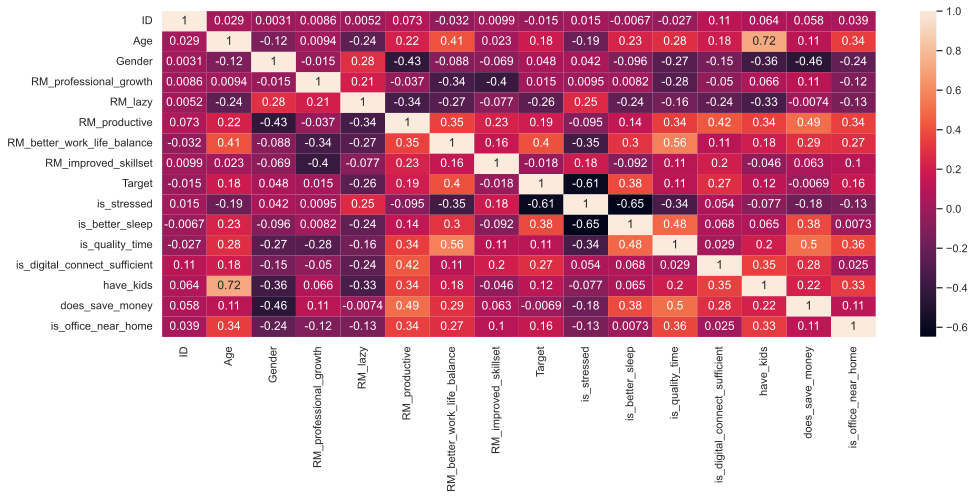

In [9]:
plt.figure(figsize=(16, 6))

corr = df.corr()
sns.heatmap(corr, annot=True)

In [12]:
df['RM_job_opportunities'].value_counts()


Not sure    87
Yes         75
No          45
Name: RM_job_opportunities, dtype: int64

In [23]:
df_cleaned = pd.get_dummies(data=df, columns=['RM_job_opportunities', 'Occupation'])
df_cleaned.drop(['ID', 'Name'], inplace=True, axis=1)
df_cleaned.columns

Index(['Age', 'Gender', 'RM_professional_growth', 'RM_lazy', 'RM_productive',
       'RM_better_work_life_balance', 'RM_improved_skillset', 'Target',
       'is_stressed', 'is_better_sleep', 'is_quality_time',
       'is_digital_connect_sufficient', 'have_kids', 'does_save_money',
       'is_office_near_home', 'RM_job_opportunities_No',
       'RM_job_opportunities_Not sure', 'RM_job_opportunities_Yes',
       'Occupation_Business', 'Occupation_Engineer', 'Occupation_HR',
       'Occupation_Manager', 'Occupation_Marketing ', 'Occupation_Recruiter',
       'Occupation_Tutor'],
      dtype='object')

In [118]:
# X = df_cleaned.columns
# X = X.drop('Target')

X_cols = ['Age', 'Gender', 'have_kids', 'Occupation_Business', 'Occupation_Engineer', 'Occupation_HR',
       'Occupation_Manager', 'Occupation_Marketing ', 'Occupation_Recruiter',
       'Occupation_Tutor', 'is_office_near_home']

X = df_cleaned[X_cols]
y = df_cleaned['Target']


In [119]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [120]:
X_test

,Age,Gender,have_kids,Occupation_Business,Occupation_Engineer,Occupation_HR,Occupation_Manager,Occupation_Marketing,Occupation_Recruiter,Occupation_Tutor,is_office_near_home
186,22,1,0,0,1,0,0,0,0,0,0
155,24,1,0,1,0,0,0,0,0,0,0
165,42,0,1,0,0,0,0,0,0,1,1
200,24,0,1,0,0,1,0,0,0,0,0
58,21,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
88,25,0,0,0,1,0,0,0,0,0,1
39,26,0,0,0,0,1,0,0,0,0,0
114,25,0,0,0,1,0,0,0,0,0,1
132,30,1,0,0,0,0,1,0,0,0,1


In [211]:
dt = DecisionTreeClassifier(criterion = 'gini', random_state = 42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [212]:
dt_pred_test = dt.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(y_test, dt_pred_test))

Testing Set Evaluation F1-Score=> 0.7441860465116279


In [233]:
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42, n_estimators=400)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=400, random_state=42)

In [234]:
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation F1-Score=>',f1_score(y_test,rfc_pred_test))

Testing Set Evaluation F1-Score=> 0.8260869565217391


In [235]:
rfc_pred_test

array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0])

In [236]:
feature_importances = rfc.feature_importances_
feature_importances

df_f_importances = pd.DataFrame({
    'feature_importances': feature_importances
}, index=df_cleaned[X_cols].columns)

df_f_importances.head()

,feature_importances
Age,0.464015
Gender,0.116955
have_kids,0.072012
Occupation_Business,0.029236
Occupation_Engineer,0.052989


In [237]:
estimator = rfc.estimators_[0]


In [238]:
export_graphviz(
    estimator,
    out_file="tree.dot",
    feature_names=X_cols,
    class_names='Target',
    rounded = True, proportion = False, 
    precision = 2, filled = True
)

In [239]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=250'])

0

In [240]:
import joblib
joblib.dump(rfc, 'my_model.pkl', compress=9)

['my_model.pkl']

In [241]:
X_test

,Age,Gender,have_kids,Occupation_Business,Occupation_Engineer,Occupation_HR,Occupation_Manager,Occupation_Marketing,Occupation_Recruiter,Occupation_Tutor,is_office_near_home
186,22,1,0,0,1,0,0,0,0,0,0
155,24,1,0,1,0,0,0,0,0,0,0
165,42,0,1,0,0,0,0,0,0,1,1
200,24,0,1,0,0,1,0,0,0,0,0
58,21,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
88,25,0,0,0,1,0,0,0,0,0,1
39,26,0,0,0,0,1,0,0,0,0,0
114,25,0,0,0,1,0,0,0,0,0,1
132,30,1,0,0,0,0,1,0,0,0,1


In [242]:
df_template = df_cleaned[X_cols].copy()
df_template = df_template[0:0]
df_template.to_csv('df_template.csv')
df_cleaned[X_cols].to_csv('cleaned_df.csv')